<center>
<img src="logo.png" height="900"> 
</center>


#  Описательные статистики

В этой тетрадке мы поговорим про описательные статистики и простые визуализации.

In [1]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')    # стиль графиков

Опция `matplotlib inline` - позволяет рисовать графики прямо в ноутбуке.

In [2]:
%matplotlib inline

# 1. Данные

In [3]:
df = pd.read_csv("data/youtube_data_short.csv", sep = "\t")

In [4]:
print(df.shape)

(19124, 10)


In [5]:
df[105:112]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
105,"""Первая четверть"" Юбилейный концерт в Олимпийс...",11.0,0.0,125.0,rock,арбенина,2225.0,NaN,NaN,8
106,"""Первая четверть"" юбилейный концерт Дианы Арбе...",43.0,3.0,399.0,rock,арбенина,3177.0,NaN,NaN,0
107,"""Перелётная птица"" [Москва, 2012г.]",2.0,3.0,56.0,shanson,ирина_круг,8325.0,2.0,0.0,1984
108,"""Пока ещё не поздно"". Михаил Круг. Жизнь и люб...",7.0,7.0,108.0,shanson,ирина_круг,29928.0,5.0,0.0,2148
109,"""Пока ещё не поздно"". Михаил Круг. Любовь и см...",15.0,11.0,158.0,shanson,ирина_круг,27185.0,9.0,0.0,2148
110,"""Последний герой"" с Дианой Арбениной - пре...",1.0,1.0,31.0,rock,арбенина,1953.0,1.0,0.0,892
111,"""Последний герой: Павел Кашин (тизер программы...",0.0,1.0,9.0,rock,арбенина,954.0,NaN,NaN,757


In [6]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

__Описание колонок:__

- `title` - название видео
- `commentCount` - число комментариев
- `dislikeCount` - число дизлайков
- `likeCount`  - число лайков
- `music_style` - музыкальный стиль
- `performer` - исполнитель
- `viewCount` - число просмотров
- `commentators_uniq` - число уникальных комментаторов
- `comments_obscene_cnt` - число комментариев
- `video_age` - возраст видео в днях

Возраст видео посчитан в днях относительно `2019-03-15` (момент, когда данные собирались авторами курса).

# 2. Описательные статистики

In [7]:
np.mean(df.likeCount.values)

nan

In [8]:
df.likeCount.values.mean()

nan

### 2.1 Максимальное и минимальное значения

Посмотрим, какое в таблице есть максимальное и минимальное количество лайков под видео.

In [9]:
df.likeCount.max()

1686810.0

In [10]:
df['likeCount'].min()

0.0

Обратите внимание, что мы можем обращаться к столбцам ещё и через точку (только если имя столбца не содержит пробелов / точек / запятых / и т.д.). Давайте посмотрим кто накопил такое большое число лайков под своим клипом. 

In [11]:
mx = df.likeCount.max()
mx

1686810.0

In [12]:
df[df.likeCount == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


### 2.2 Меры центральной тенденции (среднего уровня)

Меры центральной тенденции — показатели, представляющие собой ответ на вопрос: «На что похожа середина данных?». Середину можно описывать с помощью разных показателей! Давайте посмотрим на них. 

**Среднее**

В случае со средним значением «серединой» будет среднее арифметическое. Среднее значение отражает типичный показатель в наборе данных. Если мы случайно выберем один из показателей, то, скорее всего, получим значение, близкое к среднему.

In [13]:
df.likeCount.mean()

5735.014482758621

**Медиана**

Чтобы найти медиану, данные нужно расположить в порядке возрастания. Медианой будет значение, которое совпадает с серединой набора данных. Если количество значений чётное, то берётся среднее двух значений, которые «окружают» середину.

In [14]:
df.likeCount.median()

100.0

Медиана сильно отличается от среднего это происходит из-за выбросов, характеризующихся очедь длинным хвостом распределения.

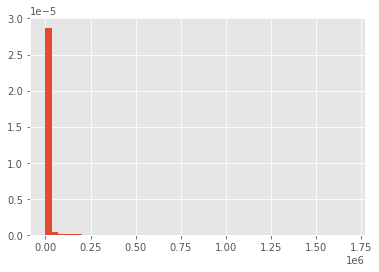

In [15]:
df.likeCount.hist(bins=50, density=True);

Сделаем по вертикале логарифмическую шкалу, чтобы лучше разглядеть выбросы в хвосте. 

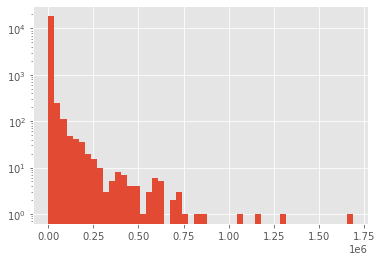

In [16]:
df.likeCount.hist(bins=50, log=True);

__Запомните на всю жизнь:__ выбросы - зло. Среднее значение чувствительно к выбросам, а медиана нет. 

### 2.3 Меры разброса

Выше мы посмотрели на то насколько данные типичные. Кроме типичность интересно насколько в данных сильный разброс. Меры разброса отвечают на вопрос: «Как сильно мои данные могут отличаться от типичного значения?».

**Дисперсия и стандартное отклонение**

In [17]:
df.likeCount.var(ddof=0) # дисперсия, variance

1513365309.7446747

In [18]:
df.likeCount.var(ddof=1) # несмещённый вариант

1513445598.635849

In [19]:
df.likeCount.std(ddof=0) # стандартное отклонение, standard deviation

38901.99621799214

In [20]:
df.likeCount.std(ddof=1) # несмещённый вариант

38903.02814223912

### 2.4 Квантили

In [21]:
df.likeCount.quantile(0.99)

128146.6499999979

Выходит, что у $99\%$ видео из выборки меньше $128146$ лайков, и у $1\%$ - больше. Выведем самых залайканные жанры из этого $1\%$. 

In [22]:
q = df.likeCount.quantile(0.99)

In [23]:
x = df[df.likeCount > q].music_style
x.value_counts()

rap        108
popsa       36
rock        19
classic     18
indi         7
estrada      1
Name: music_style, dtype: int64

### 2.5 Хочу всё и сразу

**Метод describe** считает всё и сразу! 

In [24]:
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,19124.000000
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,131.594608,8.952899,1389.772642
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,333.584804,37.887947,1054.261698
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,4.000000,0.000000,378.000000
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,13.000000,0.000000,1213.000000
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,61.000000,2.000000,2218.000000
max,303077.000000,640698.000000,1.686810e+06,2.720477e+08,3702.000000,693.000000,4574.000000


Для каждой переменной мы видим: 

* `count` - число наблюдений, которое есть без пропусков
* `mean` - среднее значение
* `std` - стандартное отклонение
* `min` -  минимум
* `max` -  максимум
* `50%` -  медиана (половина выборки больше неё, половина меньше)
* `25%` -  25% квантиль (четверть выборки меньше, 75% больше)
* `75%` -  75% квантиль

Можно построить такую же табличку только для категориальных переменных. 


In [25]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

In [26]:
df.describe(include='object')

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


* `count` -  число наблюдений, которое есть без пропусков
* `unique` - число уникальных значений (категорий), которые принимает переменная
* `top` - мода для каждой категории
* `freq` - частота, с которой встречается мода

# 3. Группировка

Если бы нас попросили посчитать, какое среднее число лайков ставят под видео разных жанров, мы могли бы узнать ответ с помощью срезов. 

In [27]:
df[df.music_style == 'rap'].likeCount.mean()

26802.456253089473

In [28]:
df[df.music_style == 'popsa'].likeCount.mean()

7492.273791654158

Такой код надо продублировать для каждого жанра. Это не очень эффективно. Чтобы так не делать, придумали группировки. Их обычно делают с помощью метода `groupby`.

In [29]:
df.groupby(['music_style', 'performer'])[['likeCount', 'dislikeCount'] ].agg(['mean', 'count'])

likeCount       dislikeCount      
                                       mean count         mean count
music_style performer                                               
classic     classical_channel  28663.333333   297  1236.228956   297
estrada     агутин                39.333333     3     4.666667     3
            басков              1582.721311   122   233.270492   122
            буйнов                 2.795455    44     0.727273    44
            ваенга               133.773360   503     9.310139   503
...                                     ...   ...          ...   ...
shanson     жека                 505.681159   138    49.702899   138
            ирина_круг          1520.352381   105   185.847619   105
            михаил_круг          418.111340   485    44.216495   485
            трофимов             252.857759   232    15.478448   232
            шуфутинский          357.132565   347    17.040346   347

[111 rows x 4 columns]

В качестве аргумента в этой переменной нужно указать по каким переменным мы хотели бы осуществить группировку применяемой функции. В данной ситуации это жанр.

Можно делать `groupby` по нескольким колонкам, получать результаты по нескольким колонкам и даже применять несколько функций за раз! 

In [30]:
(df['commentators_uniq'] > 0).sum()

12314

In [31]:
df['is_comment'] = 1*(df['commentators_uniq'] > 0)  # есть ли под видео комментарии 
df['is_comment'].value_counts()

1    12314
0     6810
Name: is_comment, dtype: int64

In [32]:
df.groupby(['music_style', 'is_comment'])[['dislikeCount', 'likeCount']].agg(['count','min','max','mean'])

dislikeCount                             likeCount  \
                              count  min       max         mean     count   
music_style is_comment                                                      
classic     0                    32  0.0    6127.0   206.125000        32   
            1                   265  0.0   52892.0  1360.618868       265   
estrada     0                  1589  0.0    2584.0     9.333543      1589   
            1                  2362  0.0  348770.0   284.050804      2362   
indi        0                   719  0.0   14244.0    69.887344       719   
            1                   638  0.0   32478.0   390.062696       638   
popsa       0                   754  0.0   82016.0   218.583554       754   
            1                  2577  0.0  177367.0   957.398525      2577   
rap         0                   238  0.0  194450.0  3435.579832       238   
            1                  1785  0.0  640698.0  4188.108123      1785   
rock        0                  2196  0.0    2514.0    16.923953      2196   
            1                  3639  0.0  133644.0   451.100302      3639   
shanson     0                  1200  0.0    1712.0     4.716667      1200   
            1                   856  0.0   12906.0   102.644860       856   

                                                       
                         min        max          mean  
music_style is_comment                                 
classic     0            1.0   250835.0   8253.218750  
            1            9.0   849676.0  31127.950943  
estrada     0            0.0    17511.0     98.007552  
            1            0.0   377957.0   1504.240898  
indi        0            0.0   389416.0   1231.396384  
            1            0.0   218384.0   3869.774295  
popsa       0            0.0   222212.0   1544.502653  
            1            0.0   698902.0   9232.521925  
rap         0            6.0  1297718.0  22701.928571  
            1           11.0  1686810.0  27349.193277  
rock        0            0.0    40720.0    186.520492  
            1            0.0   827118.0   3307.446276  
shanson     0            0.0    29401.0     78.508333  
            1            0.0    85023.0    947.702103

# 4. Apply 

Можно применить к каждому объекту ячейки одну и ту же функцию. Это можно сделать методом `apply`. Посчитаем число букв в названии каждого клипа из таблицы: 

In [33]:
name = 'NATASHA'
len(name)

7

In [34]:
df.title.apply(len)[:10]

0    25
1    41
2    75
3    38
4    30
5    48
6    36
7    43
8    29
9    56
Name: title, dtype: int64

In [35]:
df.title.apply(len).mean() # средняя длина названия

35.293871574984315

Можно написать свою функцию и применить её к колонке. Например, вот так можно достать первую букву каждого имени: 

In [36]:
def my_function(name):
    return name[0]

example = "Настя"

my_function(example)

'Н'

In [37]:
df.title.apply(my_function)[-10:]

19114    ♫
19115    ♫
19116    ♫
19117    ♫
19118    ♫
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, dtype: object

Ровно то же самое можно сделать в одну строчку с помощью лямбда-функций. Это как обычная функция, но её нигде не надо объявлять. 

In [38]:
df.title.apply(lambda name: name[0])[-10:]

19114    ♫
19115    ♫
19116    ♫
19117    ♫
19118    ♫
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, dtype: object

Преобразования можно делать сколь угодно сложными.

# 5. Гистограммы

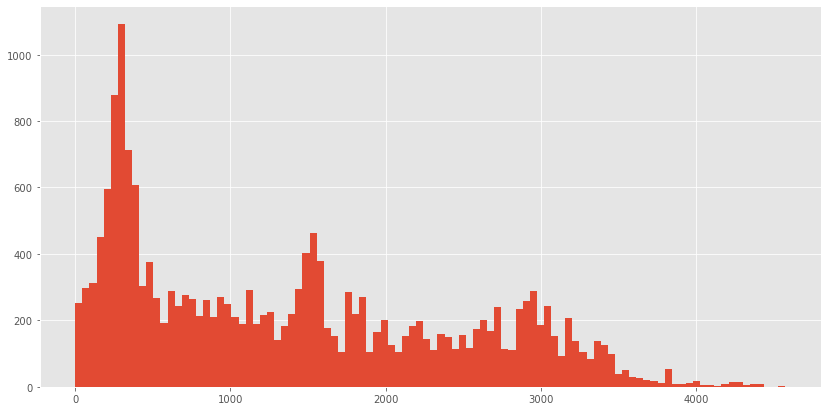

In [39]:
plt.figure(figsize=(14,7))
plt.hist(df['video_age'], bins=100);

Можно сгладить распределение.

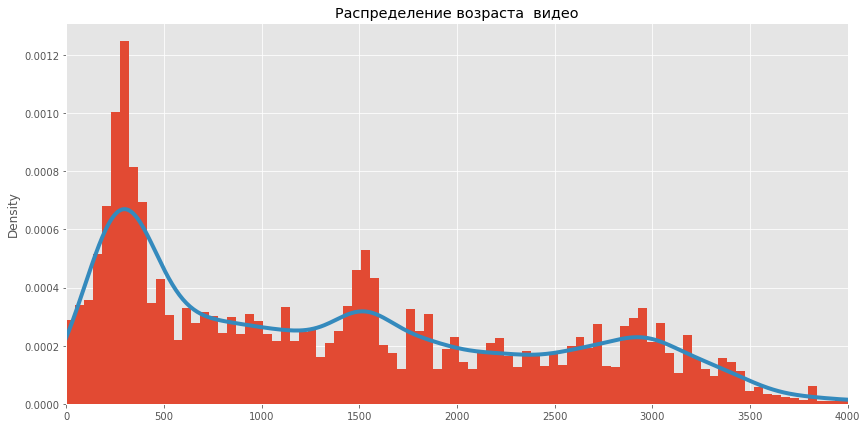

In [40]:
plt.figure(figsize=(14,7))

df['video_age'].hist(bins=100, density=True)
df['video_age'].plot(kind='kde', linewidth=4)
plt.xlim(0, 4000)
plt.title("Распределение возраста  видео");

Можно построить сразу много гистограмм. 

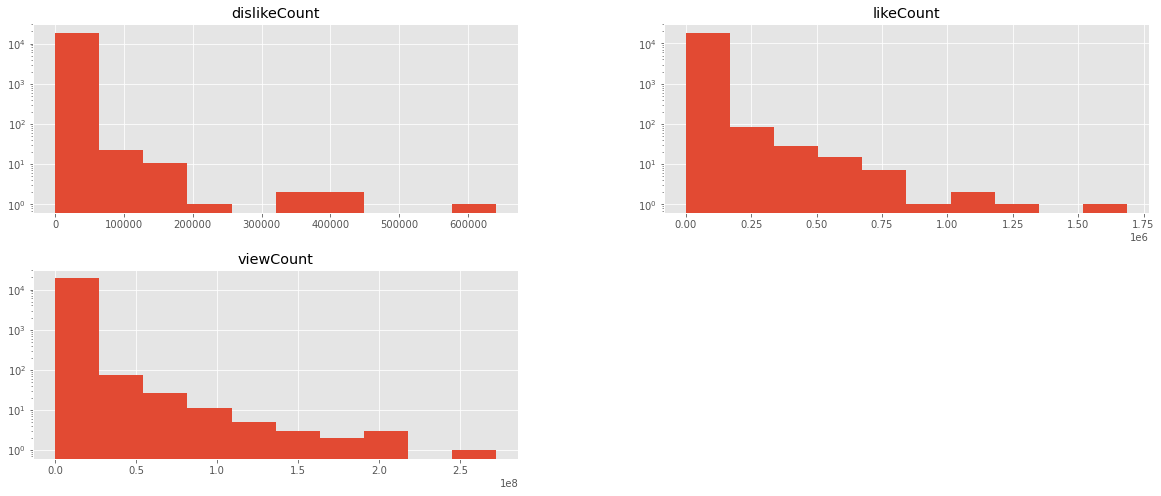

In [41]:
columns = ['viewCount', 'likeCount', 'dislikeCount']
df[columns].hist(figsize=(20, 8),log=True);

Можно построить гистограммы для логарифмов показателей. Обычно логарифмирование используют для того, чтобы сгладить выборосы и сделать данные более гладкими. Более того, на основе логарифма можно придумать преобразование, которое нормализует данные.

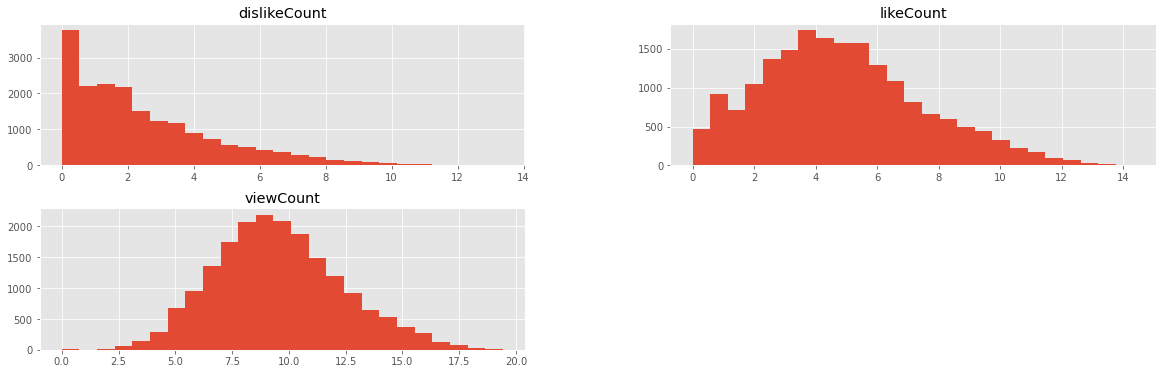

In [42]:
df[columns].apply(lambda x: np.log(x + 1)).hist(figsize=(20, 6), bins=25);

# 6. Усытые ящики

In [43]:
df_log = df[columns].apply(lambda x: np.log(x + 1)) # снова прологарифмируем
df_log['music_style'] = df['music_style']
df_log.head()

,viewCount,likeCount,dislikeCount,music_style
0,12.275142,7.246368,3.784190,popsa
1,14.613657,9.262268,6.538140,popsa
2,10.604801,5.598422,2.397895,popsa
3,9.384966,5.099866,2.079442,popsa
4,11.423919,6.393591,2.995732,popsa


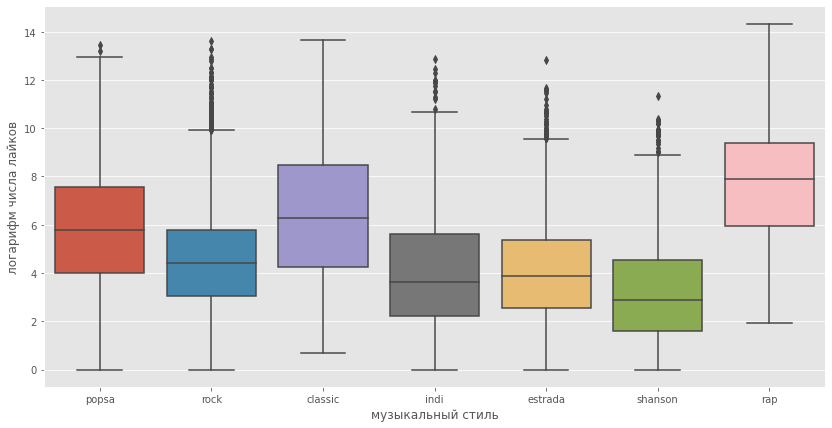

In [44]:
plt.figure(figsize=(14,7))

sns.boxplot(x='music_style', y='likeCount', data=df_log)

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');

Можно построить похожую картинку под названием виалончель. Она отражает то же самое, что и ящики с усами, но выглядит более красиво. 

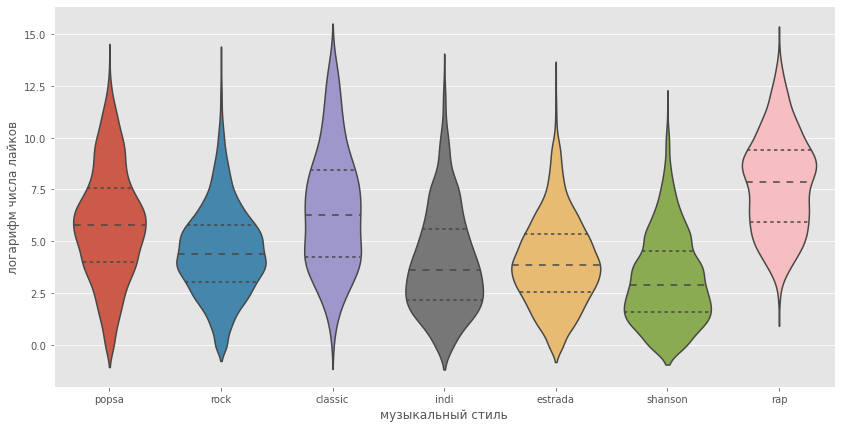

In [45]:
plt.figure(figsize=(14,7))

sns.violinplot(x='music_style', y='likeCount', 
               data=df_log, inner="quartile")

plt.xlabel('музыкальный стиль')
plt.ylabel('логарифм числа лайков');